In [4]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.misc import imread, imsave
import cv2
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


Using TensorFlow backend.


In [5]:
%matplotlib inline
sns.set_context("poster")

In [6]:
#extract the sample data
def extract_data(folder):
    X = [] # images
    y = [] # steering angle
    
    with open('data/{}/driving_log.csv'.format(folder)) as f:
        reader = csv.reader(f)
        next(reader) #skip header row
        
        for line in reader:
            X.append(imread('data/{}/{}'.format(folder, line[0])))
            y.append(line[3])
    return np.array(X), np.array(y)

In [7]:
X_train, y_train = extract_data("sample_data")

In [8]:
#reduce image to the road section
X_train = X_train[:,60:140,:]

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


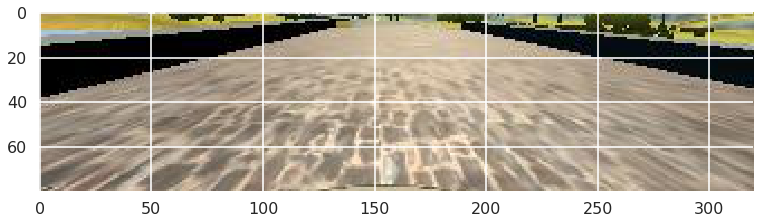

In [9]:
#view some images
plt.imshow(X_train[0])

In [18]:
def create_model():
    model = Sequential()
    
    # preprocess
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(80, 320, 3)))
    
    # conv1 layer
    model.add(Convolution2D(24, 5, 5))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Activation('selu'))
    
    # conv2 layer
    model.add(Convolution2D(36, 5, 5))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Activation('selu'))
    
    # conv3 layer
    model.add(Convolution2D(48, 5, 5))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Activation('selu'))
    
    # conv4 layer
    model.add(Convolution2D(64, 3, 3))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Activation('selu'))
    

    #add fully connected layers
    model.add(Flatten()) #Flatten input image
    
    # fc1
    model.add(Dense(256))
    model.add(Dropout(0.5))
    model.add(Activation('selu'))
    
    # fc2
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Activation('selu'))
    
    # fc3
    model.add(Dense(64))
    model.add(Dropout(0.5))
    model.add(Activation('selu'))
    
    model.add(Dense(1)) #output layer with 1 regression value
    model.compile(loss="mse", optimizer="adam")

    return model

In [19]:
model = create_model()
model.fit(X_train, y_train, validation_split=.33, shuffle=True, epochs=5)
model.save("sample_data_model.h5")

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5))`
  
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5))`
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Train on 5384 samples, validate on 2652 samples
Epoch 1/5
5384/5384 [==============================] - 17s - loss: 4.4810 - val_loss: 0.2440
Epoch 2/5
5384/5384 [==============================] - 16s - loss: 1.2012 - val_loss: 0.5437
Epoch 3/5
5384/5384 [==============================] - 16s - loss: 0.8145 - val_loss: 0.0217
Epoch 4/5
5384/5384 [==============================] - 16s - loss: 0.6170 - val_loss: 0.0269
Epoch 5/5
5384/5384 [==============================] - 17s - loss: 0.4345 - val_loss: 0.0346
